# Unit 5 - Financial Planning

In [54]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [73]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [74]:
# Load .env enviroment variables
load_dotenv()


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [56]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3
# YOUR CODE HERE!
crypto_data = {
    "coins": [1.2, 5.3]
}

coins = ["BTC", "ETH"]

coin_shares = pd.DataFrame(crypto_data, index=coins)

coin_shares

coins
BTC    1.2
ETH    5.3

In [57]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [58]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_request = requests.get(btc_url).json()
#btc_request = json.dumps(btc_request, indent=4)
btc_price = btc_request['data']['1']['quotes']['USD']['price']

In [59]:
# Fetch current ETH price
# YOUR CODE HERE!
eth_request = requests.get(eth_url).json()
#print(json.dumps(eth_request, indent=4))
eth_price = eth_request['data']['1027']['quotes']['USD']['price']

In [60]:
# Compute current value of my crpto
# YOUR CODE HERE!

my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

btc_value = btc_price * coin_shares.loc["BTC"]["coins"]
eth_value = eth_price * coin_shares.loc["ETH"]["coins"]
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45436.80
The current value of your 5.3 ETH is $13639.97


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [61]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [62]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [63]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2022-01-21", tz="America/Chicago").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2022-01-21 00:00:00-05:00  112.19  112.35  112.11  112.24  7792653  445.56   

                                                              
                             high     low   close     volume  
time                                                          
2022-01-21 00:00:00-05:00  448.06  437.97  438.11  174541929

In [64]:
shares_data = {
    "shares": [200, 50]
}

tickers = ["AGG", "SPY"]

df_shares = pd.DataFrame(shares_data, index=tickers)

df_shares

shares
AGG     200
SPY      50

In [65]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $112.24
Current SPY closing price: $438.11


In [66]:
# Compute the current value of shares
# YOUR CODE HERE!
agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]
spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $21905.50
The current value of your 200 AGG shares is $22448.00


### Savings Health Analysis

In [67]:
# Consolidate financial assets data
#pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)

# YOUR CODE HERE!
crypto_value = {
    "BTC": [my_btc_value],
    "ETH": [my_eth_value],
    
}
crypto_value_df = pd.DataFrame(crypto_value)
crypto_value_df

BTC        ETH
0  45436.8  13639.974

In [68]:
# Consolidate financial assets data
# YOUR CODE HERE!
shares_value = {
    "AGG": [agg_value],
    "SPY": [spy_value]
}
shares_value_df = pd.DataFrame(shares_value)
shares_value_df

AGG      SPY
0  22448.0  21905.5

In [69]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = {
    "income" : ["12000"]
}

In [70]:
# Consolidate financial assets data
# YOUR CODE HERE!
joined_portfolio = {
   "Crypto": [crypto_value_df],
   "Shares": [shares_value_df]
}
#absjoined_portfolio

joined_portfolio_df = pd.DataFrame(joined_portfolio)
joined_portfolio_df

Crypto  \
0         BTC        ETH
0  45436.8  13639.974   

                                    Shares  
0         AGG      SPY
0  22448.0  21905.5

In [37]:
# Create savings DataFrame
# YOUR CODE HERE!
#savings_df = pd.DataFrame(crypto_value_df, shares_value_df, index = ["crypto", "shares"])
# Display savings DataFrame
#savings_df

TypeError: __init__() got multiple values for argument 'index'

<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

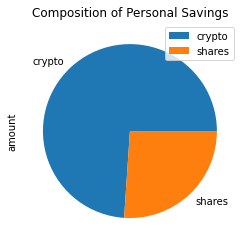

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!

df_shares.plot.pie(y="amount", title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

# Validate saving health
# YOUR CODE HERE!

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [71]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-01-25', tz='America/Chicago').isoformat()
end_date = pd.Timestamp('2022-01-25', tz='America/Chicago').isoformat()

In [76]:
# Get 5 years' worth of historical data for SPY and AGG

# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

timeframe = "1D"


tickers = ['SPY', 'AGG']


df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_ticker.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2018-02-05 00:00:00-05:00  107.12  107.8100  107.00  107.630  4879995.0   
2018-02-06 00:00:00-05:00  107.46  107.5600  107.28  107.300  5489931.0   
2018-02-07 00:00:00-05:00  107.43  107.4369  107.00  107.085  3440626.0   
2018-02-08 00:00:00-05:00  106.84  107.1400  106.77  106.920  4351275.0   
2018-02-09 00:00:00-05:00  106.78  107.0700  106.70  106.760  5603974.0   

                              SPY                                       
                             open    high     low   close       volume  
time                                                                    
2018-02-05 00:00:00-05:00     NaN     NaN     NaN     NaN          NaN  
2018-02-06 00:00:00-05:00  259.99  269.70  254.12  269.18  232359323.0  
2018-02-07 00:00:00-05:00  268.50  272.36  267.63  267.66  112819262.0  
2018-02-08 00:00:00-05:00  267.97  268.17  257.59  257.72  156654099.0  
2018-02-09 00:00:00-05:00  260.80  263.61  252.92  261.67  207357854.0

In [78]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)




In [79]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_dist.portfolio_data.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2018-02-05 00:00:00-05:00  107.12  107.8100  107.00  107.630  4879995.0   
2018-02-06 00:00:00-05:00  107.46  107.5600  107.28  107.300  5489931.0   
2018-02-07 00:00:00-05:00  107.43  107.4369  107.00  107.085  3440626.0   
2018-02-08 00:00:00-05:00  106.84  107.1400  106.77  106.920  4351275.0   
2018-02-09 00:00:00-05:00  106.78  107.0700  106.70  106.760  5603974.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-05 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-02-06 00:00:00-05:00    -0.003066  259.99  269.70  254.12  269.18   
2018-02-07 00:00:00-05:00    -0.002004  268.50  272.36  267.63  267.66   
2018-02-08 00:00:00-05:00    -0.001541  267.97  268.17  257.59  257.72   
2018-02-09 00:00:00-05:00    -0.001496  260.80  263.61  252.92  261.67   

                                                     
                                volume daily_return  
time                                                 
2018-02-05 00:00:00-05:00          NaN          NaN  
2018-02-06 00:00:00-05:00  232359323.0          NaN  
2018-02-07 00:00:00-05:00  112819262.0    -0.005647  
2018-02-08 00:00:00-05:00  156654099.0    -0.037137  
2018-02-09 00:00:00-05:00  207357854.0     0.015327

In [80]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\alexm\desktop\umn_fintech\class_repo\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0          1         2         3          4         5    \
0      1.000000   1.000000  1.000000  1.000000   1.000000  1.000000   
1      0.989022   0.995316  0.990673  0.995795   0.998983  0.996999   
2      0.997289   0.998421  0.991829  1.000215   0.994994  1.000079   
3      0.993720   1.005948  0.983234  1.009946   0.996158  1.004752   
4      0.998122   0.998292  0.974408  1.028276   1.004413  0.997768   
...         ...        ...       ...       ...        ...       ...   
7556  42.539044  12.492383  4.509418  9.382581  10.508529  8.709392   
7557  42.271249  12.552038  4.529706  9.357975  10.400879  8.722134   
7558  42.048888  12.788392  4.531246  9.501819  10.286612  8.721166   
7559  42.136158  12.587347  4.566027  9.488097  10.207243  8.758833   
7560  42.810924  12.627437  4.612301  9.482380  10.301203  8.575832   

            6          7          8         9    ...       490        491  \
0      1.000000   1.000000   1.000000  1.000000  ...  1.000000   1.000000   
1      1.007325   0.991787   0.991176  0.997454  ...  0.995762   1.010811   
2      1.004856   0.995427   0.987844  1.002832  ...  1.002119   1.008841   
3      1.024268   0.998284   0.986515  0.986827  ...  0.991297   0.999243   
4      1.021756   0.999314   0.990770  0.981623  ...  0.989018   0.998081   
...         ...        ...        ...       ...  ...       ...        ...   
7556  14.722512  23.146089   9.913492  6.559897  ...  5.519873  11.362308   
7557  14.937443  23.515736   9.912761  6.537600  ...  5.589038  11.386388   
7558  14.964503  23.411781   9.939211  6.596106  ...  5.553552  11.405230   
7559  15.093686  23.241555   9.988357  6.626550  ...  5.627703  11.421698   
7560  15.089985  23.183853  10.080203  6.618018  ...  5.642144  11.319091   

           492       493        494       495       496        497       498  \
0     1.000000  1.000000   1.000000  1.000000  1.000000   1.000000  1.000000   
1     1.001654  0.996074   1.010003  0.999460  1.006201   0.989559  0.997346   
2     1.000294  1.000237   1.003124  1.014003  1.013336   0.982700  0.995578   
3     1.008400  1.001559   1.013945  1.012646  1.020739   0.985168  0.988647   
4     1.001387  1.005846   1.015071  1.021531  1.016359   0.985314  0.981303   
...        ...       ...        ...       ...       ...        ...       ...   
7556  5.231161  3.162371  18.612442  6.841298  8.633359  21.596571  6.022671   
7557  5.229100  3.165235  18.706744  6.865329  8.543922  21.674996  5.981754   
7558  5.275778  3.158094  18.484699  6.907708  8.480699  21.600414  5.995222   
7559  5.284317  3.156254  18.384277  6.923083  8.505757  21.616137  6.042531   
7560  5.243726  3.180399  18.264843  6.939799  8.479465  21.637339  6.089714   

            499  
0      1.000000  
1      1.007597  
2      0.999946  
3      1.002289  
4      1.004685  
...         ...  
7556  53.323985  
7557  53.957492  
7558  54.447074  
7559  54.889847  
7560  55.406788  

[7561 rows x 500 columns]

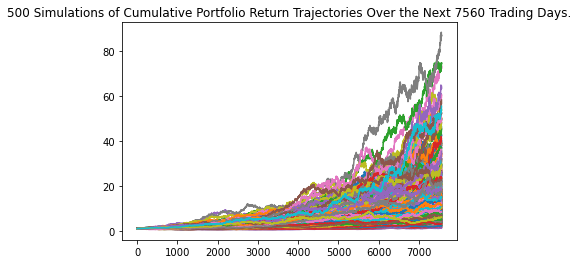

In [81]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_dist.plot_simulation()

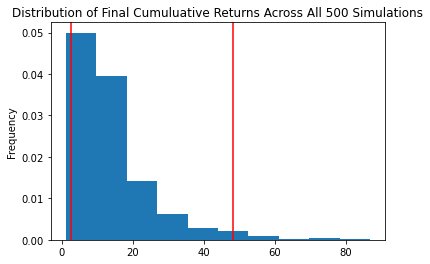

In [82]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [84]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(MC_tbl)

count           500.000000
mean             14.453230
std              11.701291
min               1.196478
25%               6.456414
50%              11.277639
75%              17.733510
max              86.864742
95% CI Lower      2.640237
95% CI Upper     48.189905
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [86]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
MC_ci_lower = round(MC_tbl[8]*initial_investment,2)
MC_ci_upper = round(MC_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${MC_ci_lower} and ${MC_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $52804.74 and $963798.09


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [87]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
initial_investment = 15000
MC_ci_lower = round(MC_tbl[8]*initial_investment,2)
MC_ci_upper = round(MC_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${MC_ci_lower} and ${MC_ci_upper}")

There is a 95% chance that an initial investment of $15000 in the portfolio over the next 30 years will end within in the range of $39603.55 and $722848.57


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [88]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_early_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_early_dist.portfolio_data.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2018-02-05 00:00:00-05:00  107.12  107.8100  107.00  107.630  4879995.0   
2018-02-06 00:00:00-05:00  107.46  107.5600  107.28  107.300  5489931.0   
2018-02-07 00:00:00-05:00  107.43  107.4369  107.00  107.085  3440626.0   
2018-02-08 00:00:00-05:00  106.84  107.1400  106.77  106.920  4351275.0   
2018-02-09 00:00:00-05:00  106.78  107.0700  106.70  106.760  5603974.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-05 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-02-06 00:00:00-05:00    -0.003066  259.99  269.70  254.12  269.18   
2018-02-07 00:00:00-05:00    -0.002004  268.50  272.36  267.63  267.66   
2018-02-08 00:00:00-05:00    -0.001541  267.97  268.17  257.59  257.72   
2018-02-09 00:00:00-05:00    -0.001496  260.80  263.61  252.92  261.67   

                                                     
                                volume daily_return  
time                                                 
2018-02-05 00:00:00-05:00          NaN          NaN  
2018-02-06 00:00:00-05:00  232359323.0          NaN  
2018-02-07 00:00:00-05:00  112819262.0    -0.005647  
2018-02-08 00:00:00-05:00  156654099.0    -0.037137  
2018-02-09 00:00:00-05:00  207357854.0     0.015327

In [89]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_early_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\alexm\desktop\umn_fintech\class_repo\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.005939  0.986874  1.010149  0.997174  1.005030  0.992804  1.004298   
2     1.020670  1.000620  1.018252  0.985650  1.007412  0.981533  0.993242   
3     1.018046  0.989650  1.022830  0.998712  1.011571  0.974334  0.998809   
4     1.029901  0.993939  1.020062  1.000596  1.009666  0.977073  1.001149   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.789711  1.883290  1.565734  1.244134  1.773735  1.334432  1.845676   
1257  1.809054  1.895983  1.577927  1.256713  1.799403  1.342645  1.865662   
1258  1.776813  1.877620  1.570157  1.273122  1.792264  1.348397  1.860830   
1259  1.768926  1.900435  1.575239  1.286940  1.793461  1.346189  1.878463   
1260  1.757655  1.901253  1.590063  1.271483  1.790041  1.354589  1.861192   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.999673  1.004046  0.991843  ...  0.994088  0.982753  1.000794   
2     1.000170  1.010444  0.982088  ...  0.997926  0.996283  1.001138   
3     1.003758  0.998004  0.992216  ...  0.987608  0.998347  1.005766   
4     1.013360  0.989025  0.999289  ...  0.977396  1.006587  1.005556   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.227735  1.214482  1.319816  ...  2.378946  1.283874  1.422712   
1257  1.231021  1.213256  1.334386  ...  2.371203  1.279690  1.425577   
1258  1.228604  1.218772  1.335497  ...  2.369479  1.297486  1.426480   
1259  1.218908  1.215367  1.323349  ...  2.343253  1.283161  1.439481   
1260  1.219477  1.201271  1.330645  ...  2.306477  1.288626  1.435124   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.998420  0.988154  0.990632  1.005358  0.998719  1.000730  0.983402  
2     0.980155  0.984331  0.986007  0.992716  0.990856  0.994671  0.981219  
3     0.980939  0.993858  0.983772  0.986301  0.988484  0.991489  0.991192  
4     0.997137  0.981862  0.981998  0.990963  0.982830  0.998229  0.989374  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.594784  1.037657  1.239800  1.854225  1.675999  1.626463  2.176744  
1257  1.597911  1.027548  1.237889  1.869139  1.679655  1.641028  2.142618  
1258  1.609021  1.023949  1.233662  1.884891  1.695447  1.645712  2.157343  
1259  1.618354  1.031866  1.238416  1.871629  1.682419  1.660262  2.170017  
1260  1.632198  1.028169  1.242297  1.864279  1.695520  1.662323  2.171065  

[1261 rows x 500 columns]

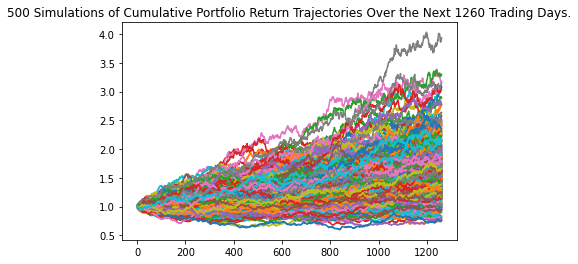

In [90]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot2 = MC_early_dist.plot_simulation()

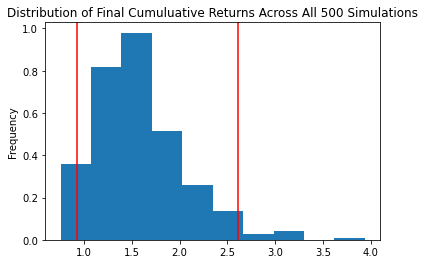

In [91]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot2 = MC_early_dist.plot_distribution()

In [92]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_tbl2 = MC_early_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(MC_tbl2)

count           500.000000
mean              1.584280
std               0.456663
min               0.753681
25%               1.263004
50%               1.524461
75%               1.829105
max               3.938052
95% CI Lower      0.925789
95% CI Upper      2.612469
Name: 1260, dtype: float64


In [94]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(MC_tbl2[8]*initial_investment,2)
ci_upper_five = round(MC_tbl2[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55547.33 and $156748.12


### Ten Years Retirement Option

In [95]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_ten_dist.portfolio_data.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2018-02-05 00:00:00-05:00  107.12  107.8100  107.00  107.630  4879995.0   
2018-02-06 00:00:00-05:00  107.46  107.5600  107.28  107.300  5489931.0   
2018-02-07 00:00:00-05:00  107.43  107.4369  107.00  107.085  3440626.0   
2018-02-08 00:00:00-05:00  106.84  107.1400  106.77  106.920  4351275.0   
2018-02-09 00:00:00-05:00  106.78  107.0700  106.70  106.760  5603974.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-05 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-02-06 00:00:00-05:00    -0.003066  259.99  269.70  254.12  269.18   
2018-02-07 00:00:00-05:00    -0.002004  268.50  272.36  267.63  267.66   
2018-02-08 00:00:00-05:00    -0.001541  267.97  268.17  257.59  257.72   
2018-02-09 00:00:00-05:00    -0.001496  260.80  263.61  252.92  261.67   

                                                     
                                volume daily_return  
time                                                 
2018-02-05 00:00:00-05:00          NaN          NaN  
2018-02-06 00:00:00-05:00  232359323.0          NaN  
2018-02-07 00:00:00-05:00  112819262.0    -0.005647  
2018-02-08 00:00:00-05:00  156654099.0    -0.037137  
2018-02-09 00:00:00-05:00  207357854.0     0.015327

In [96]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\alexm\desktop\umn_fintech\class_repo\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.023294  0.996477  0.987555  0.997146  0.991177  0.990372  0.991197   
2     1.020152  1.007107  0.982407  0.997723  0.988963  0.994399  0.976158   
3     1.019447  1.012981  0.976328  0.993191  0.980941  0.986723  0.983634   
4     1.007012  1.013044  0.986442  0.999943  0.976699  0.977589  0.988189   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.224611  1.768347  0.691049  2.298665  2.206977  1.700318  0.929364   
2517  2.214871  1.758881  0.686222  2.288256  2.171867  1.688585  0.921922   
2518  2.229922  1.771758  0.683956  2.289210  2.166805  1.711133  0.919283   
2519  2.233528  1.769842  0.684075  2.291557  2.210418  1.710133  0.925912   
2520  2.233799  1.761567  0.686776  2.321122  2.214518  1.696365  0.913536   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.995418  0.986805  1.000452  ...  1.001841  0.987259  0.997585   
2     0.997266  0.979731  0.987613  ...  1.012168  0.978583  1.002498   
3     0.989361  0.974099  0.975398  ...  1.001418  0.974164  0.993333   
4     0.987647  0.977188  0.977691  ...  1.001497  0.983446  1.001991   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.852736  2.266450  2.133903  ...  1.966098  2.205327  1.047073   
2517  1.888845  2.291628  2.127092  ...  1.963564  2.194054  1.057000   
2518  1.894850  2.301216  2.121427  ...  1.935981  2.202640  1.082286   
2519  1.897544  2.315572  2.131739  ...  1.944105  2.180722  1.079881   
2520  1.900837  2.310912  2.140123  ...  1.939388  2.181818  1.082162   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.003747  0.996619  1.001930  1.015567  1.014103  1.007298  1.008744  
2     1.014554  1.017234  1.008534  1.018473  1.023435  1.010007  1.010383  
3     1.022267  1.021057  1.014236  1.016959  1.035140  1.020880  1.004854  
4     1.024454  1.017553  1.032827  1.015245  1.035718  1.024660  1.008789  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.658049  1.453486  4.884311  1.012084  2.741109  2.651693  2.045782  
2517  1.659107  1.440834  4.864939  1.016812  2.761823  2.655808  2.042201  
2518  1.658863  1.463862  4.853274  1.017777  2.784738  2.648700  2.047685  
2519  1.658781  1.479250  4.848077  1.022807  2.795991  2.621959  2.048826  
2520  1.650255  1.475398  4.868690  1.021352  2.784330  2.606572  2.081064  

[2521 rows x 500 columns]

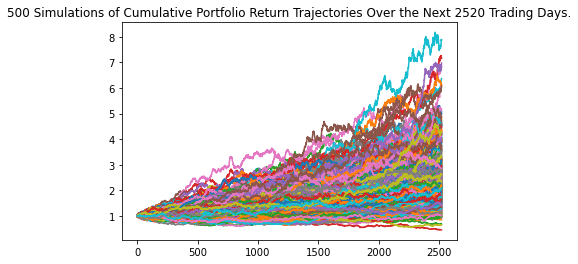

In [97]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot3 = MC_ten_dist.plot_simulation()

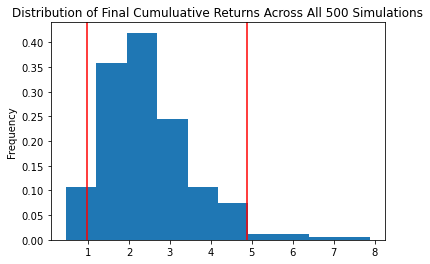

In [98]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot3 = MC_ten_dist.plot_distribution()

In [99]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_tbl3 = MC_ten_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(MC_tbl3)

count           500.000000
mean              2.456288
std               1.080401
min               0.455627
25%               1.726896
50%               2.211637
75%               2.940087
max               7.891394
95% CI Lower      0.984606
95% CI Upper      4.874224
Name: 2520, dtype: float64


In [100]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(MC_tbl3[8]*initial_investment,2)
ci_upper_ten = round(MC_tbl3[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $59076.37 and $292453.43
